In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt

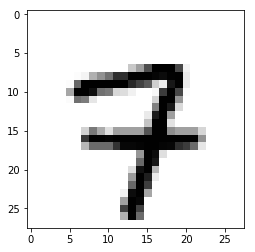

7


In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

exampleindex = 324
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [6]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(28 * 28,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd', loss='mse')

hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 3.9528
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 3.4305
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 3.3633
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 3.3330
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 3.3295
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 3.3107
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 3.3063
Epoch 8/10
60000/60000 [==============================] - 2s 26us/step - loss: 3.3039
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 3.2977
Epoch 10/10
60000/60000 [==============================] - 1s 20us/step - loss: 3.3055


In [9]:
preds = model.predict(x_test)

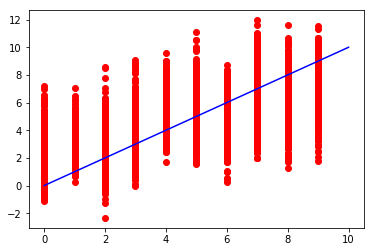

In [11]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

In [12]:
print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))

0.2129
